## Our probabilistic graph method to perform node classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import sys
import os
import time

In [2]:
# importar el modelo
sys.path.append(os.path.abspath(".."))
from model import probabilistic_graph_model 

In [3]:
# carpeta donde se toman los datos
carpeta_datos = ".\\Data\\"

# carpeta donde se guardan los parametros
parameters_path = ".\\Model\\"

# archivo donde se ponen los hyperparameters
hyperparameters_file = ".\\Model\\hyperparameters.csv"

# archivo de predicciones
results_file = ".\\Predictions\\"

## Cargar datos

In [4]:
# cargar el grafo
with open(carpeta_datos + "graph_nx.json", 'rb') as f:
    graph = pickle.load(f)
    
num_nodos = graph.number_of_nodes()
num_aristas = graph.number_of_edges()

print(f"Se tienen {num_nodos} nodos")
print(f"Se tienen {num_aristas} aristas")

Se tienen 169343 nodos
Se tienen 1166243 aristas


In [5]:
# ver que se tiene
graph.nodes()[6974]

{'label': 26,
 'division': 'val',
 'title': 'deep neural networks for optimal team composition',
 'abstract': "Cooperation is a fundamental social mechanism, whose effects on human performance have been investigated in several environments. Online games are modern-days natural settings in which cooperation strongly affects human behavior. Every day, millions of players connect and play together in team-based games: the patterns of cooperation can either foster or hinder individual skill learning and performance. This work has three goals: (i) identifying teammates' influence on players' performance in the short and long term, (ii) designing a computational framework to recommend teammates to improve players' performance, and (iii) setting to demonstrate that such improvements can be predicted via deep learning. We leverage a large dataset from Dota 2, a popular Multiplayer Online Battle Arena game. We generate a directed co-play network, whose links' weights depict the effect of teamma

## Create model

In [6]:
# provide all information of the grapg
model = probabilistic_graph_model(graph, 
                                 name_atributes_x = 't_y_a',
                                 name_label_y = 'label',
                                 name_division = 'division')

# see model information
model.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 169343
Number of edges: 1166243
Number of classes: 40

Training nodes:   90941 (53.70%)
Validation nodes: 29799 (17.60%)
Testing nodes:    48603 (28.70%)
Useless nodes:    0 (0.00%)
----------------------------------------------------------------------------------------------------


## In degree distribution

Analize zero discrete lognormal distribution
For the in distribution


Label: 2 (2)
Sample of size 4839

Estimated parameters:
beta = 0.336226493077082
mu = 0.7617941786079425
sigma = 1.0826420759561137
Normalization C = 1.0963812744745112

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[1627.         1013.09366492  647.52909606  412.12013194  274.69474786
  191.02145125  137.55636191  101.93042692   77.34331882   59.86822666
   47.13520421   37.65801607   30.47325963   24.93827758  156.63781618]
Observed values in cells
[1627, 1025, 628, 412, 279, 186, 124, 115, 82, 51, 58, 40, 40, 16, 156]


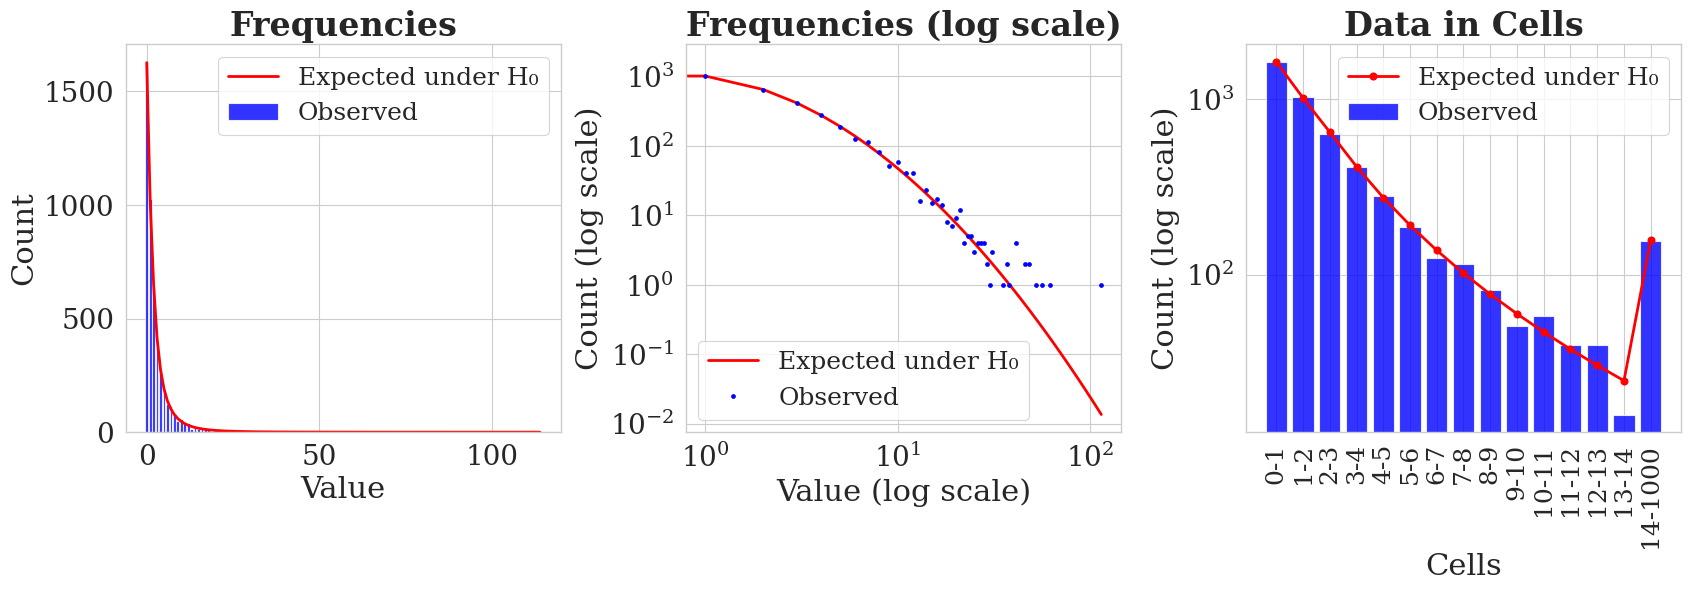


Chi square test 

Statistic T = 14.368766008221433
p-value = 0.21325545435682725
The distribution is zero discrete lognormal
----------------------------------------------------------------------------------------------------


In [7]:
# individual example
model.analize_zero_discrete_lognormal(mode = "in", 
                                      labels_check = [2],
                                      number_cells = 15,
                                      show_ind_results = True)

Analize zero discrete lognormal distribution
For the in distribution



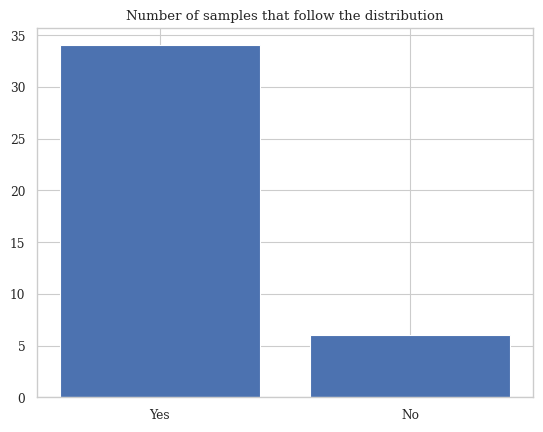


Yes : 34 (85.0)
No : 6 (15.0)

Unsuccessful labels:
Label: 7 (7)
Label: 13 (13)
Label: 16 (16)
Label: 24 (24)
Label: 30 (30)
Label: 34 (34)


In [8]:
# all samples
model.analize_zero_discrete_lognormal(mode = "in", 
                                      D_max = 1000,
                                      number_cells = 15,
                                      show_ind_results = False)

Analize zero discrete lognormal distribution
For the in distribution


Label: 30 (30)
Sample of size 11814

Estimated parameters:
beta = 0.35305569663111563
mu = 0.7414202656967284
sigma = 1.830847536646826
Normalization C = 1.2991366809131366

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 14], [14, 29], [29, 1000]]

Expecteed values in cells
[4171.         1993.26952    1081.42308335  707.60376346  508.3659581
  386.72013273  305.88470038  248.93963203  207.06586092  175.24219735
  150.41432219  130.62604049  215.92027986  769.65022664  761.87428251]
Observed values in cells
[4171, 1914, 1139, 770, 510, 408, 272, 236, 201, 185, 165, 122, 230, 763, 728]


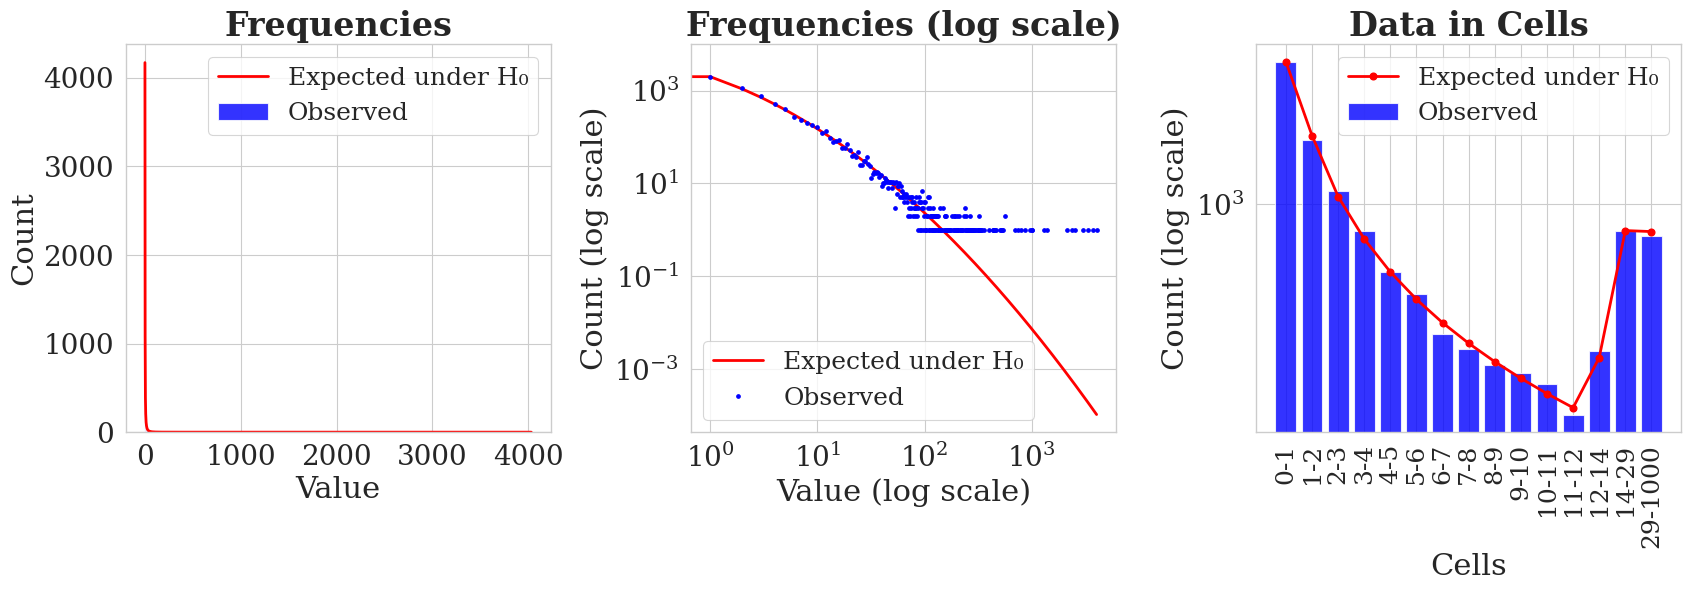


Chi square test 

Statistic T = 22.509138728496428
p-value = 0.02071261513586396
The distribution is NOT zero discrete lognormal
----------------------------------------------------------------------------------------------------


In [9]:
# see an unsuccessful example
model.analize_zero_discrete_lognormal(mode = "in", 
                                      labels_check = [30],
                                      number_cells = 15,
                                      show_ind_results = True)

## Out degree distribution

Analize zero discrete lognormal distribution
For the out distribution



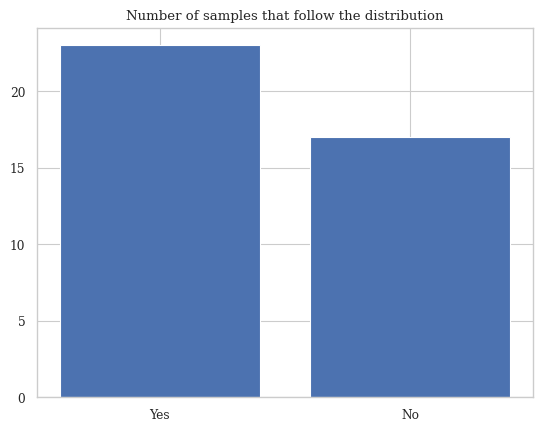


Yes : 23 (57.5)
No : 17 (42.5)

Unsuccessful labels:
Label: 2 (2)
Label: 9 (9)
Label: 12 (12)
Label: 13 (13)
Label: 16 (16)
Label: 17 (17)
Label: 24 (24)
Label: 25 (25)
Label: 26 (26)
Label: 27 (27)
Label: 28 (28)
Label: 30 (30)
Label: 31 (31)
Label: 33 (33)
Label: 34 (34)
Label: 36 (36)
Label: 38 (38)


In [10]:
# all samples
model.analize_zero_discrete_lognormal(mode = "out", 
                                      D_max = 1000,
                                      number_cells = 15,
                                      show_ind_results = False)

## Classification

Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:17<00:00, 1017.15it/s]


{'f1_macro': 0.5840983496329889, 'f1_weighted': 0.7509187371085401, 'f1_micro': 0.7568039195946172}

In validation nodes
Inference on interation 1 is 83% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|███████████████████████████████████████████████████████████████████████████| 78402/78402 [01:18<00:00, 999.78it/s]


{'f1_macro': 0.5750139035283816, 'f1_weighted': 0.750376691137465, 'f1_micro': 0.7592201080573173}

In validation nodes
Inference on interation 1 is 84% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|███████████████████████████████████████████████████████████████████████████| 78402/78402 [01:19<00:00, 990.30it/s]


{'f1_macro': 0.5890748689648604, 'f1_weighted': 0.7516747603893181, 'f1_micro': 0.7571730594986409}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:17<00:00, 1012.57it/s]


{'f1_macro': 0.5799919921511278, 'f1_weighted': 0.7506353658731189, 'f1_micro': 0.7592536662304105}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:16<00:00, 1030.66it/s]


{'f1_macro': 0.5869858258147338, 'f1_weighted': 0.7502869222361637, 'f1_micro': 0.7553944763247089}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:14<00:00, 1054.01it/s]


{'f1_macro': 0.5770011008288445, 'f1_weighted': 0.7500839359932433, 'f1_micro': 0.758414711903084}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:09<00:00, 1135.20it/s]


{'f1_macro': 0.5869362436086794, 'f1_weighted': 0.7488638406076366, 'f1_micro': 0.7538508003624282}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:07<00:00, 1163.23it/s]


{'f1_macro': 0.5798110281977777, 'f1_weighted': 0.7496902400092266, 'f1_micro': 0.7580120138259673}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:04<00:00, 1206.68it/s]


{'f1_macro': 0.5848810446157802, 'f1_weighted': 0.7479542891540837, 'f1_micro': 0.7526427061310782}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:10<00:00, 1117.92it/s]


{'f1_macro': 0.5764616849929675, 'f1_weighted': 0.7489148309380543, 'f1_micro': 0.7571395013255479}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:10<00:00, 1117.50it/s]


{'f1_macro': 0.5858290420641241, 'f1_weighted': 0.7478790761953724, 'f1_micro': 0.752508473438706}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:11<00:00, 1095.61it/s]


{'f1_macro': 0.5791877095483565, 'f1_weighted': 0.748801710957465, 'f1_micro': 0.7571059431524548}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 96% equal

Analize statistics of results in 29799 validation nodes


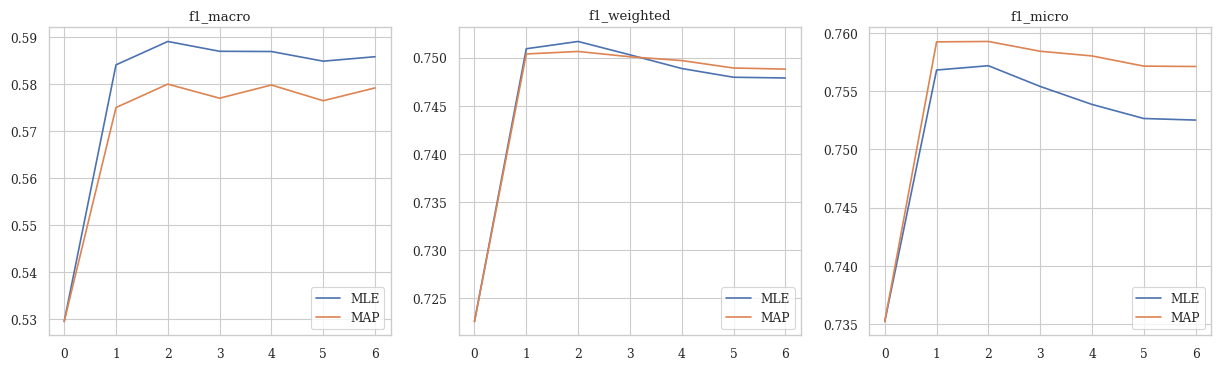

MLE achieves the best f1_micro 0.75717 in iteration 2
MAP achieves the best f1_micro 0.75925 in iteracion 2
Mejor desempeño MLE
{'f1_macro': 0.5890748689648604, 'f1_weighted': 0.7516747603893181, 'f1_micro': 0.7571730594986409}
Mejor desempeño MAP
{'f1_macro': 0.5799919921511278, 'f1_weighted': 0.7506353658731189, 'f1_micro': 0.7592536662304105}


In [11]:
# set hyperparameters
config = {
    
    "Vectorizer" : "tfidf",  # count tfidf
    "Ngram_range": (1, 2),  # (1, 1) , (1, 2)
    "Min_df": 1,
    "Max_df": 0.5,
    "Max_features": None, # None, 10000, 3000000
    "alpha_omega": 0.002,
    
    "alpha_pi" : 0,
    "alhpa_Theta": 1,
    "alpha_Xi" : 1,
    
    "D_in_max" : 10,
    "psi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_psi": 0.1,                           # en caso de hacer additive_smoothing
    
    "D_out_max": 200,
    "phi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_phi": 2,                            # en caso de hacer additive_smoothing
    
    "method_iteration_0": "text",            # text, random, near
    "num_iterations": 6,
    "Metric" : "f1_micro", 
}

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)

model.probabilistic_inference_complete(config,
                                       folder_parameters = parameters_path,
                                       prediction_path = results_file,
                                       hyperparameters_file = hyperparameters_file)


## Evaluate

In [12]:
# validation data
print("ML")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_map_,
                                     metodo = "map"))

ML
{'f1_macro': 0.5890748689648604, 'f1_weighted': 0.7516747603893181, 'f1_micro': 0.7571730594986409}

MAP
{'f1_macro': 0.5799919921511278, 'f1_weighted': 0.7506353658731189, 'f1_micro': 0.7592536662304105}


In [13]:
# test data
print("ML")
print(model.evaluate_test_nodes(iteration = model.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model.evaluate_test_nodes(iteration = model.best_iter_map_,
                                method = "map"))

ML
{'f1_macro': 0.5654125351585229, 'f1_weighted': 0.7356607288267262, 'f1_micro': 0.7405921445178281}

MAP
{'f1_macro': 0.5543290024515773, 'f1_weighted': 0.7354291423497067, 'f1_micro': 0.7439664218258132}


# Robustness Analysis

In [14]:
# folder to save this results (its trash)
parameters_path_ra = ".\\Robustness Analysis\\"
hyperparameters_file_ra = ".\\Robustness Analysis\\hyperparameters.csv"
results_file_ra = ".\\Robustness Analysis\\"

### 1) Graph without edges

In [15]:
# create graph
graph_ra = graph.copy()
graph_ra.remove_edges_from(list(graph_ra.edges))

# create model
model_ra = probabilistic_graph_model(graph_ra, 
                                    name_atributes_x = 't_y_a',
                                    name_label_y = 'label',
                                    name_division = 'division')
# see model information
model_ra.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 169343
Number of edges: 0
Number of classes: 40

Training nodes:   90941 (53.70%)
Validation nodes: 29799 (17.60%)
Testing nodes:    48603 (28.70%)
Useless nodes:    0 (0.00%)
----------------------------------------------------------------------------------------------------


Estimating parameters...


C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:481: RuntimeWarning: divide by zero encountered in log
  matrix_log_phi[i] = np.log(probabilidades)
C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:379: RuntimeWarning: divide by zero encountered in log
  matrix_log_psi[i] = np.log(probabilidades)


Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:40<00:00, 1945.33it/s]


{'f1_macro': 0.553521401255362, 'f1_weighted': 0.7290682098484967, 'f1_micro': 0.7364005503540387}

In validation nodes
Inference on interation 1 is 94% equal to the last iteration

Inference using MAP


100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:40<00:00, 1913.49it/s]


{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}

In validation nodes
Inference on interation 1 is 100% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 94% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:42<00:00, 1852.54it/s]


{'f1_macro': 0.553521401255362, 'f1_weighted': 0.7290682098484967, 'f1_micro': 0.7364005503540387}

In validation nodes
Inference on interation 2 is 100% equal to the last iteration

Inference using MAP


100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:39<00:00, 1997.52it/s]


{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}

In validation nodes
Inference on interation 2 is 100% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 94% equal

Analize statistics of results in 29799 validation nodes


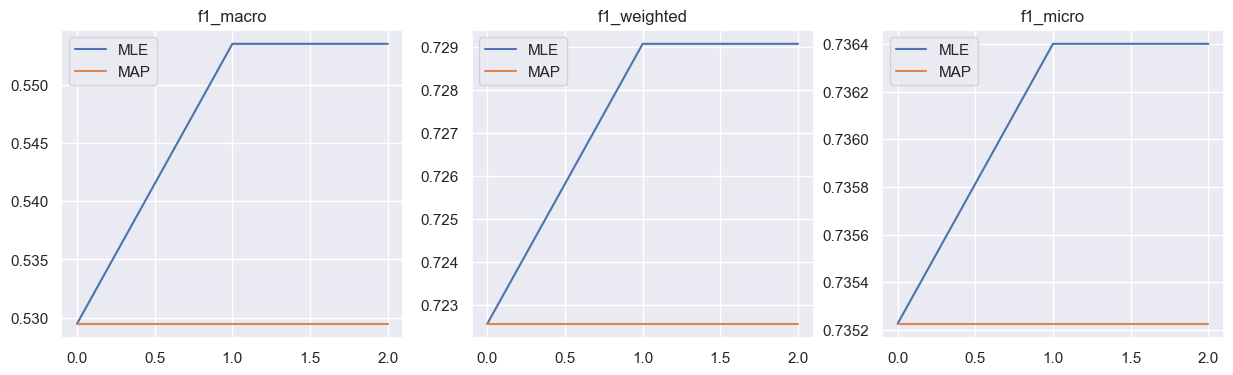

MLE achieves the best f1_micro 0.7364 in iteration 1
MAP achieves the best f1_micro 0.73523 in iteracion 0
Mejor desempeño MLE
{'f1_macro': 0.553521401255362, 'f1_weighted': 0.7290682098484967, 'f1_micro': 0.7364005503540387}
Mejor desempeño MAP
{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}


In [16]:
# modify config for no edges
config_ra = config.copy()
config_ra["psi_dist"] = "additive_smoothing"
config_ra["phi_dist"] = "additive_smoothing"
config_ra["alpha_phi"] = 0
config_ra["alpha_psi"] = 0
config_ra["method_iteration_0"] = "text"
config_ra["num_iterations"] = 2


# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)
model_ra.probabilistic_inference_complete(config_ra,
                                          folder_parameters = parameters_path_ra,
                                         prediction_path = results_file_ra,
                                         hyperparameters_file = hyperparameters_file_ra)

In [17]:
# evaluate it
print("Validation Data:")
print("ML")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_map_,
                                     metodo = "map"))

print("-"*100)
print("Test Data:")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_map_,
                                method = "map"))

Validation Data:
ML
{'f1_macro': 0.553521401255362, 'f1_weighted': 0.7290682098484967, 'f1_micro': 0.7364005503540387}

MAP
{'f1_macro': 0.5294720681839944, 'f1_weighted': 0.7225578189246543, 'f1_micro': 0.7352260142957817}
----------------------------------------------------------------------------------------------------
Test Data:
{'f1_macro': 0.5325606825906515, 'f1_weighted': 0.707229557426215, 'f1_micro': 0.7128572310351213}

MAP
{'f1_macro': 0.5079984319570584, 'f1_weighted': 0.7018505309371509, 'f1_micro': 0.7128983807583894}


### 2) Graph without attributes

In [18]:
# create an uniform atribute
graph_ra = graph.copy()
for v, info_v in graph_ra.nodes(data=True):
    info_v['null_attribute'] = "gatonegro"
    
# create model
model_ra = probabilistic_graph_model(graph_ra, 
                                    name_atributes_x = 'null_attribute',
                                    name_label_y = 'label',
                                    name_division = 'division')
# see model information
model_ra.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 169343
Number of edges: 1166243
Number of classes: 40

Training nodes:   90941 (53.70%)
Validation nodes: 29799 (17.60%)
Testing nodes:    48603 (28.70%)
Useless nodes:    0 (0.00%)
----------------------------------------------------------------------------------------------------


Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.4210992060349252, 'f1_weighted': 0.5476333630818212, 'f1_micro': 0.5451525218967079}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  1%|▋                                                                           | 677/78402 [00:00<01:15, 1024.25it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:11<00:00, 1103.21it/s]


{'f1_macro': 0.46798543813632437, 'f1_weighted': 0.644196778486369, 'f1_micro': 0.6263633007819054}

In validation nodes
Inference on interation 1 is 65% equal to the last iteration

Inference using MAP


  1%|▋                                                                           | 670/78402 [00:00<01:14, 1046.83it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:12<00:00, 1083.35it/s]


{'f1_macro': 0.4863238804745049, 'f1_weighted': 0.6588900214957133, 'f1_micro': 0.6617671733950804}

In validation nodes
Inference on interation 1 is 70% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  1%|▋                                                                           | 668/78402 [00:00<01:08, 1138.87it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:12<00:00, 1078.46it/s]


{'f1_macro': 0.4758616340864605, 'f1_weighted': 0.6567980559266635, 'f1_micro': 0.6346521695358904}

In validation nodes
Inference on interation 2 is 88% equal to the last iteration

Inference using MAP


  1%|▋                                                                            | 680/78402 [00:00<01:28, 876.80it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:12<00:00, 1082.77it/s]


{'f1_macro': 0.5003513374806082, 'f1_weighted': 0.6782327745123381, 'f1_micro': 0.6811973556159603}

In validation nodes
Inference on interation 2 is 90% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 88% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  1%|▋                                                                           | 743/78402 [00:00<01:13, 1055.87it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:07<00:00, 1156.80it/s]


{'f1_macro': 0.4731383251100846, 'f1_weighted': 0.6499552560998769, 'f1_micro': 0.6221014127990873}

In validation nodes
Inference on interation 3 is 93% equal to the last iteration

Inference using MAP


  1%|▋                                                                           | 705/78402 [00:00<01:04, 1207.08it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:08<00:00, 1138.12it/s]


{'f1_macro': 0.5028557350338186, 'f1_weighted': 0.679374606577897, 'f1_micro': 0.6800228195577033}

In validation nodes
Inference on interation 3 is 95% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 86% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  1%|▋                                                                           | 690/78402 [00:00<01:06, 1174.16it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:09<00:00, 1135.14it/s]


{'f1_macro': 0.4697851808131951, 'f1_weighted': 0.6426180997100788, 'f1_micro': 0.6115305882747744}

In validation nodes
Inference on interation 4 is 94% equal to the last iteration

Inference using MAP


  1%|▌                                                                           | 633/78402 [00:00<01:08, 1128.42it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:07<00:00, 1166.96it/s]


{'f1_macro': 0.4998884900096372, 'f1_weighted': 0.6771226014720498, 'f1_micro': 0.6770697003255143}

In validation nodes
Inference on interation 4 is 96% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 85% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  1%|▌                                                                           | 635/78402 [00:00<00:59, 1298.19it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:06<00:00, 1175.08it/s]


{'f1_macro': 0.46854349934459094, 'f1_weighted': 0.6361153883592802, 'f1_micro': 0.6010268800966475}

In validation nodes
Inference on interation 5 is 95% equal to the last iteration

Inference using MAP


  1%|▋                                                                           | 752/78402 [00:00<01:09, 1120.42it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:08<00:00, 1138.21it/s]


{'f1_macro': 0.498937835336777, 'f1_weighted': 0.6755046087541972, 'f1_micro': 0.6736803248431156}

In validation nodes
Inference on interation 5 is 97% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 85% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  1%|▋                                                                           | 753/78402 [00:00<01:02, 1241.10it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:08<00:00, 1147.29it/s]


{'f1_macro': 0.4652900188313273, 'f1_weighted': 0.6266912187805856, 'f1_micro': 0.5879056344172623}

In validation nodes
Inference on interation 6 is 95% equal to the last iteration

Inference using MAP


  1%|▋                                                                           | 721/78402 [00:00<01:08, 1128.87it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [01:10<00:00, 1112.21it/s]


{'f1_macro': 0.4979771963612813, 'f1_weighted': 0.6740488384133044, 'f1_micro': 0.6716668344575322}

In validation nodes
Inference on interation 6 is 97% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 83% equal

Analize statistics of results in 29799 validation nodes


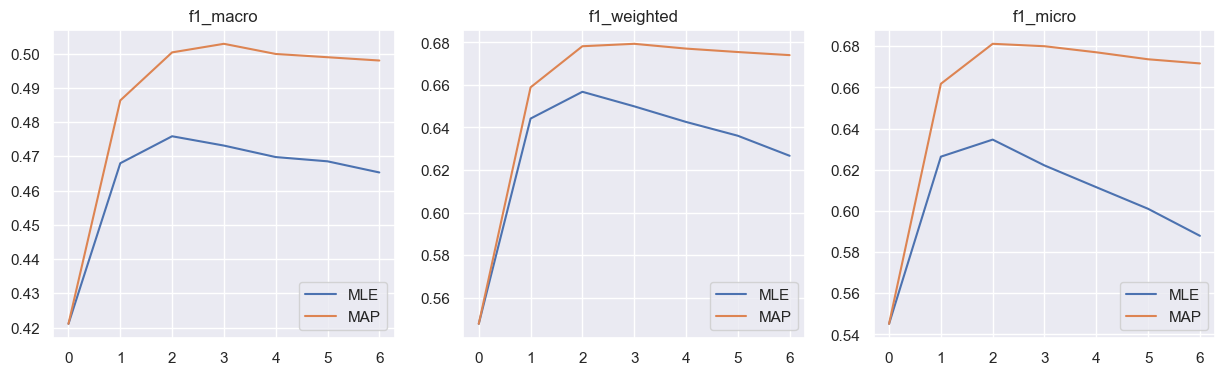

MLE achieves the best f1_micro 0.63465 in iteration 2
MAP achieves the best f1_micro 0.6812 in iteracion 2
Mejor desempeño MLE
{'f1_macro': 0.4758616340864605, 'f1_weighted': 0.6567980559266635, 'f1_micro': 0.6346521695358904}
Mejor desempeño MAP
{'f1_macro': 0.5003513374806082, 'f1_weighted': 0.6782327745123381, 'f1_micro': 0.6811973556159603}


In [19]:
# modify config for no atributes
config_ra = config.copy()
config_ra["method_iteration_0"] = "near"
config_ra["Vectorizer"] = "count"
config_ra["Ngram_range"] = (1, 1)
config_ra["alpha_omega"] = 0
config_ra["Min_df"] = 1
config_ra["Max_df"] = 1.0

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)
model_ra.probabilistic_inference_complete(config_ra,
                                          folder_parameters = parameters_path_ra,
                                         prediction_path = results_file_ra,
                                         hyperparameters_file = hyperparameters_file_ra)

In [20]:
# evaluate it
print("Validation Data:")
print("ML")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_map_,
                                     metodo = "map"))
print("-"*100)
print("Test Data:")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_map_,
                                method = "map"))

Validation Data:
ML
{'f1_macro': 0.4758616340864605, 'f1_weighted': 0.6567980559266635, 'f1_micro': 0.6346521695358904}

MAP
{'f1_macro': 0.5003513374806082, 'f1_weighted': 0.6782327745123381, 'f1_micro': 0.6811973556159603}
----------------------------------------------------------------------------------------------------
Test Data:
{'f1_macro': 0.4458195097250247, 'f1_weighted': 0.6470792700049309, 'f1_micro': 0.6261753389708454}

MAP
{'f1_macro': 0.460682968791086, 'f1_weighted': 0.662993676088674, 'f1_micro': 0.6654116001069893}
